In [2]:
import numpy as np
import matplotlib.pyplot as plt

from path_planner import PathPlanner
from dubins_dynamics import DubinsDynamics
from multi_agent_planner import MultiAgentPlanner as MAP

In [2]:
dubins = DubinsDynamics()
planner = PathPlanner(dubins, 100)
deg2rad = np.pi/180
x0 = np.array([0.0, 0.0, 0.0])
xf = np.array([5.0, 5.0, 2*np.pi/3])
u0 = np.zeros(2)
uf = np.zeros(2)
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-1, 1.],
    [-45*deg2rad, 45*deg2rad]
])
u_diff_bounds = np.array([1, np.inf])

planner.add_obstacle(np.array([2, .3]), .5)
planner.add_obstacle(np.array([5, 2]), .5)
planner.add_obstacle(np.array([3, 3]), .5)
x, u, tf = planner.solve_min_time(x0, xf, u0=u0, uf=uf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)


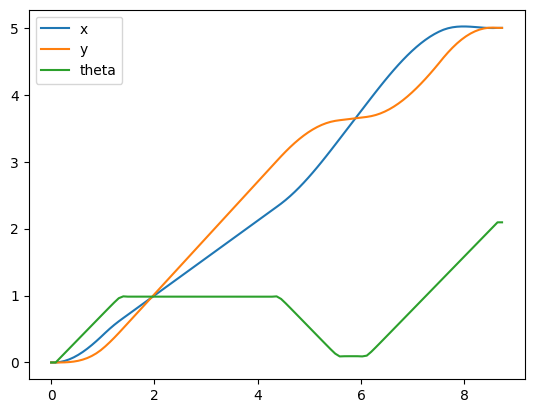

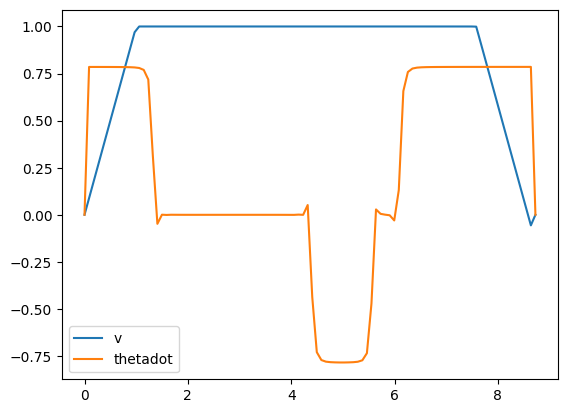

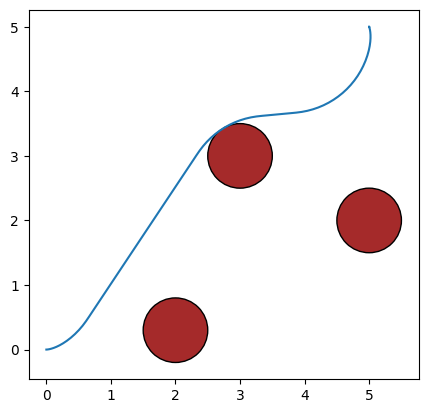

In [15]:
fig, ax = plt.subplots()
ax.plot(np.arange(x.shape[1])*tf/x.shape[1], x[0,:])
ax.plot(np.arange(x.shape[1])*tf/x.shape[1], x[1,:])
ax.plot(np.arange(x.shape[1])*tf/x.shape[1], x[2,:])
ax.legend(['x', 'y', 'theta'])

fig, ax = plt.subplots()
ax.plot(np.arange(u.shape[1])*tf/u.shape[1], u[0,:])
ax.plot(np.arange(u.shape[1])*tf/u.shape[1], u[1,:])
ax.legend(['v', 'thetadot'])

fig, ax = plt.subplots()
ax.plot(x[0,:], x[1,:])
for ob in planner.obstacles:
    ax.add_patch(plt.Circle(ob['position'], ob['radius'], facecolor='brown', edgecolor='k'))
ax.set_aspect('equal')

# 2 Rovers

In [6]:
dubins = DubinsDynamics()
planner = MAP(dubins, 2, 100)
deg2rad = np.pi/180
x0 = np.array([[0.0, 0.0, np.pi/4],
               [5.0, 5.0, 5*np.pi/4]])
xf = np.array([[5.0, 5.0, np.pi/4],
              [0.0, 0.0, 5*np.pi/4]])
u0 = np.zeros(2)
uf = np.zeros(2)
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-1, 1.],
    [-45*deg2rad, 45*deg2rad]
])
u_diff_bounds = np.array([1, np.inf])

x, u, tf = planner.solve_min_time(x0, xf, u0=u0, uf=uf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)

8.22774843854918


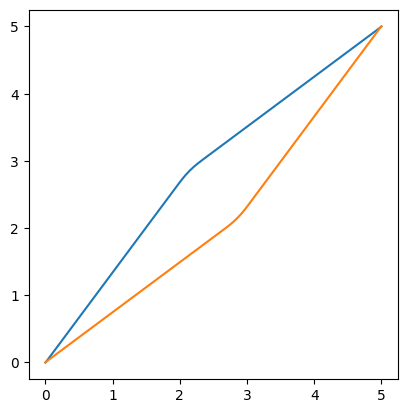

In [7]:
fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(x[i][0,:], x[i][1,:])
ax.set_aspect('equal')
print(tf)

# 3 Rovers

In [7]:
dubins = DubinsDynamics()
planner = MAP(dubins, 3, 100)
deg2rad = np.pi/180
x0 = np.array([[0.0, 0.0, np.pi/4],
               [5.0, 5.0, 5*np.pi/4],
               [2, 0, 0]])
xf = np.array([[5.0, 5.0, np.pi/4],
              [0.0, 0.0, 5*np.pi/4],
              [2, 5, 0]])
u0 = np.zeros(2)
uf = np.zeros(2)
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-1, 1.],
    [-45*deg2rad, 45*deg2rad]
])
u_diff_bounds = np.array([10, np.inf])

x, u, tf = planner.solve_min_time(x0, xf, u0=u0, uf=uf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)
# x, u, tf = planner.solve_min_time(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)

10.245020659280952


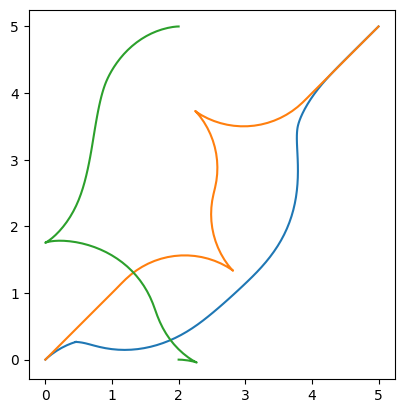

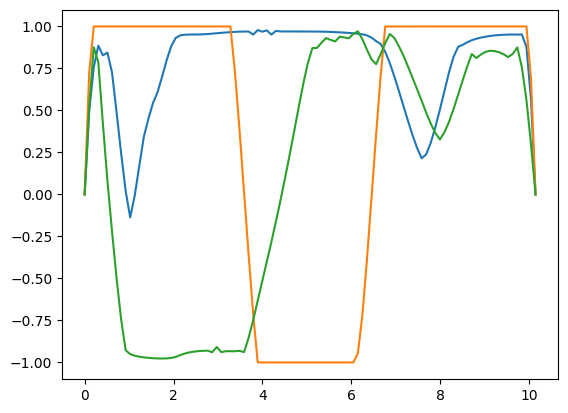

In [8]:
fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(x[i][0,:], x[i][1,:])
ax.set_aspect('equal')
print(tf)

fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(np.arange(u[i].shape[1])*tf/u[i].shape[1], u[i][0,:])

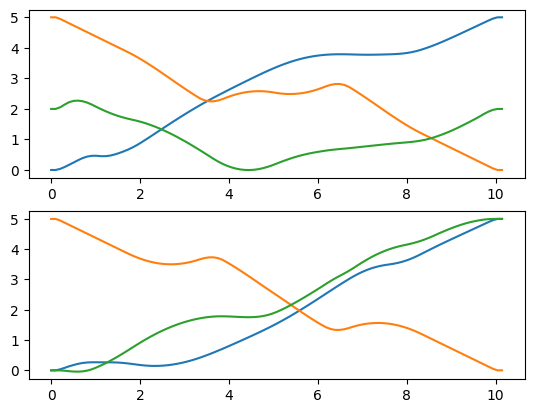

In [10]:
fig, ax = plt.subplots(2,1)
for i in range(planner.M):
    ax[0].plot(np.arange(x[i].shape[1])*tf/x[i].shape[1], x[i][0,:])

for i in range(planner.M):
    ax[1].plot(np.arange(x[i].shape[1])*tf/x[i].shape[1], x[i][1,:])